In [1]:
import os
import json
import pandas as pd

from reservoirpy.hyper import research, plot_hyperopt_report
from ESNOptimizer import optimizer2D
from static_implementation import *

In [10]:
# Importing the data we will use for exploring the model parameter space.
parent_dict = os.path.dirname(os.getcwd())
data_dict = os.path.join(parent_dict, "data", "Signals")
datafile = os.path.join(data_dict, "M_Protocol_17")
signal = pd.read_csv(datafile, header=0, delimiter=",", dtype="float").values

# Producing the config file's filepath.
config_path = os.path.join(parent_dict, "configs")
results_path = os.path.join(parent_dict, "results")

# Config file name.
experiment = os.path.join(config_path, "hyperparamTest2.json")
# experiment = os.path.join(config_path, "optimizerTest.json")

In [3]:
signal = normalize(signal).values

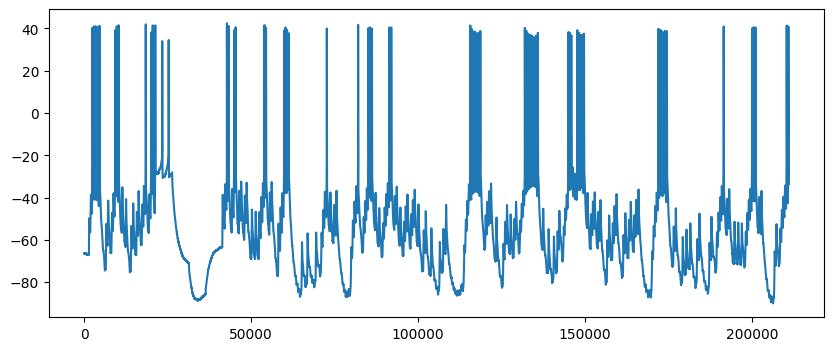

In [11]:
plt.figure(figsize=(10, 4))
plt.plot(signal[:, 1])

In [12]:
u_test, y_train, I_test, V_test = TTS_procedure(signal, train_len=1000, test_len=1000, warmup=100, dt=1)

In [13]:
print(u_test.shape)
print(y_train.shape)
print(I_test.shape)
print(V_test.shape)

(2, 1000)
(1, 900)
(1, 1000)
(1, 1000)


In [15]:
print(u_test[1, :])

[-66.48706 -66.48702 -66.48669 -66.48075 -66.4737  -66.48416 -66.49808
 -66.50207 -66.50411 -66.49843 -66.49123 -66.48512 -66.47922 -66.47973
 -66.48149 -66.48493 -66.48869 -66.4961  -66.50422 -66.51645 -66.5295
 -66.54056 -66.55123 -66.55517 -66.55778 -66.53839 -66.51465 -66.50463
 -66.49733 -66.48505 -66.47179 -66.45124 -66.42924 -66.42775 -66.43033
 -66.42795 -66.42458 -66.43551 -66.44928 -66.46873 -66.48931 -66.49223
 -66.49166 -66.49202 -66.49256 -66.48547 -66.47687 -66.46173 -66.4453
 -66.44138 -66.43995 -66.43384 -66.4268  -66.42932 -66.43373 -66.4305
 -66.42576 -66.4302  -66.43646 -66.4393  -66.44146 -66.43298 -66.42237
 -66.42351 -66.42698 -66.42576 -66.42362 -66.41798 -66.41166 -66.40372
 -66.39547 -66.37692 -66.35633 -66.3435  -66.33222 -66.33555 -66.34177
 -66.353   -66.36522 -66.38682 -66.41028 -66.43418 -66.45815 -66.48153
 -66.50478 -66.50975 -66.51109 -66.51152 -66.51177 -66.49233 -66.46898
 -66.46205 -66.45838 -66.46345 -66.47025 -66.46748 -66.46281 -66.47166
 -66.4832

In [ ]:
best_params = research(objective=optimizer2D,
                       dataset=signal,
                       config_path=experiment,
                       report_path=results_path)

C:\Users\dafyd\PycharmProjects\MastersProject\results\hyperparamTest2\loss_charts.png


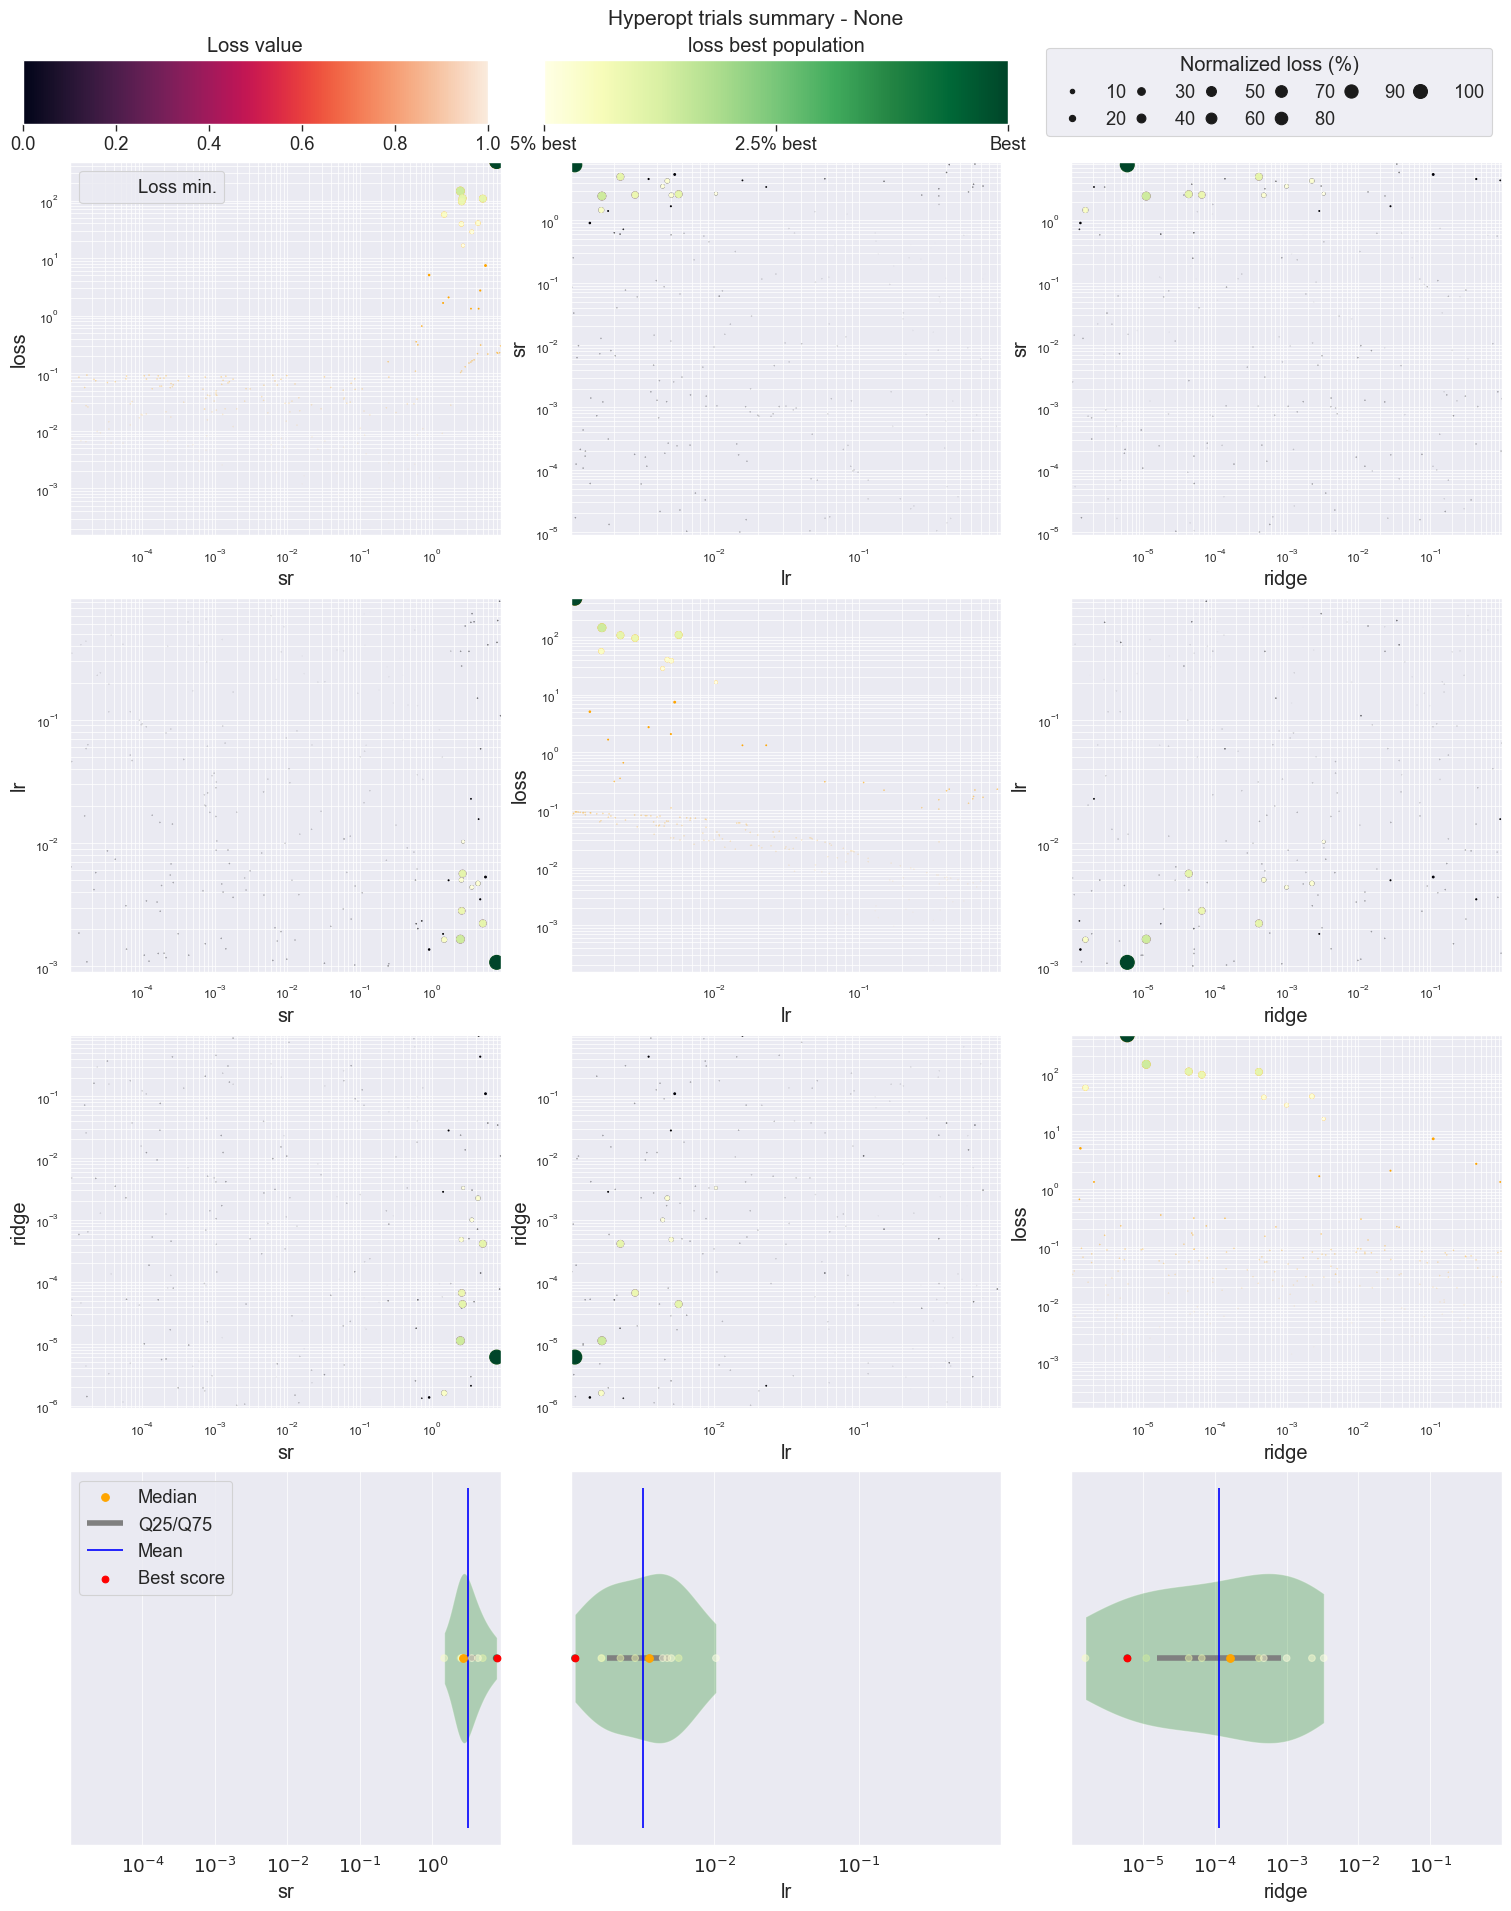

In [11]:
fig = plot_hyperopt_report(
    exp=os.path.join(results_path, "hyperparamTest2"),
    params=["sr", "lr", "ridge"],
    metric="loss"
)

json_dir_parent = os.path.join(results_path, "hyperparamTest2")
figure_destination = os.path.join(json_dir_parent, "loss_charts.png")
print(figure_destination)

fig.savefig(json_dir_parent)

+### Now compile all of the data into a neat dataframe for easier comparison and storage.

In [7]:
json_dir_parent = os.path.join(results_path, "hyperparamTest2")
json_dir = os.path.join(json_dir_parent, "results")
json_files = [f for f in os.listdir(json_dir) if f.endswith(".json")]
# print(json_files)

data_list = []

# Define the keys to extract from the nested dictionaries
keys_to_extract = ['loss', 'R2', 'duration']
keys_to_ignore = ['test_interval', 'train_interval', 'N', 'horizon', 'iss']

# Iterate over JSON files
for file in json_files:
    with open(os.path.join(json_dir, file), 'r') as json_file:
        data = json.load(json_file)

        # Extract keys from the nested dictionaries
        extracted_data = {
            'loss': data['returned_dict']['loss'],
            'R2': data['returned_dict']['r2'],
            'duration': data['returned_dict']['duration']
        }

        # Extract params (except test_interval and train_interval)
        extracted_data.update({
            key: value for key, value in data['current_params'].items() if key not in keys_to_ignore
        })

        # Append the extracted data to the list
        print(extracted_data)
        data_list.append(extracted_data)

df = pd.DataFrame(data_list)

df.head()

{'loss': 0.000173547833891343, 'R2': 0.9999980913047904, 'duration': 11.905645847320557, 'lr': 0.7412991793034155, 'ridge': 1.8669745524620381e-06, 'seed': 1, 'sr': 0.2517985348315826}
{'loss': 0.00019274686641677571, 'R2': 0.9999977914121331, 'duration': 12.74014163017273, 'lr': 0.33498915604796037, 'ridge': 4.258907472853333e-06, 'seed': 1, 'sr': 0.43563602739875745}
{'loss': 0.00020685034178512802, 'R2': 0.9999966429896346, 'duration': 12.42701768875122, 'lr': 0.7433970824167144, 'ridge': 1.224792895943802e-06, 'seed': 1, 'sr': 0.1371750889176371}
{'loss': 0.00021847573278127203, 'R2': 0.9999971386280798, 'duration': 12.527269840240479, 'lr': 0.3147035299887268, 'ridge': 4.216931014578322e-06, 'seed': 1, 'sr': 0.35807688615345507}
{'loss': 0.00023957864260827074, 'R2': 0.9999963951529555, 'duration': 12.702763795852661, 'lr': 0.968279504112416, 'ridge': 0.001004111401169055, 'seed': 1, 'sr': 0.5934186360188092}
{'loss': 0.00025738205884008695, 'R2': 0.9999960976402245, 'duration': 1

,loss,R2,duration,lr,ridge,seed,sr
0,0.000174,0.999998,11.905646,0.741299,0.000002,1,0.251799
1,0.000193,0.999998,12.740142,0.334989,0.000004,1,0.435636
2,0.000207,0.999997,12.427018,0.743397,0.000001,1,0.137175
3,0.000218,0.999997,12.527270,0.314704,0.000004,1,0.358077
4,0.000240,0.999996,12.702764,0.968280,0.001004,1,0.593419


In [9]:
df.to_csv("hyperparamTest2.csv", index=False)